<a href="https://colab.research.google.com/github/drm69/PCVK25_3F_12/blob/main/Week3_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama  : Firdaus Yuli Darmawan

Kelas : D4TI 3F

NIM   : 2341720244

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


 Mengubah tingkat kecerahan citra 
-------------------------------
Masukkan nilai kecerahan: 50


/tmp/ipython-input-1752920920.py:19: RuntimeWarning: overflow encountered in scalar add
  brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)


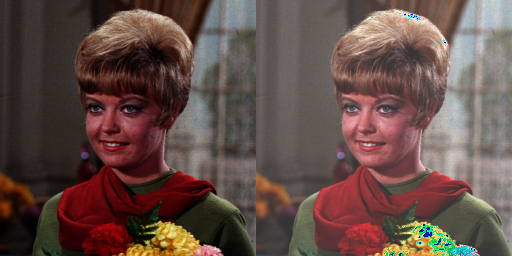

In [3]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(' Mengubah tingkat kecerahan citra ')
print('-------------------------------')
try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y, x, c] = np.clip(original[y, x, c] + brightness, 0, 255)

# cara simple tanpa for loop
# brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

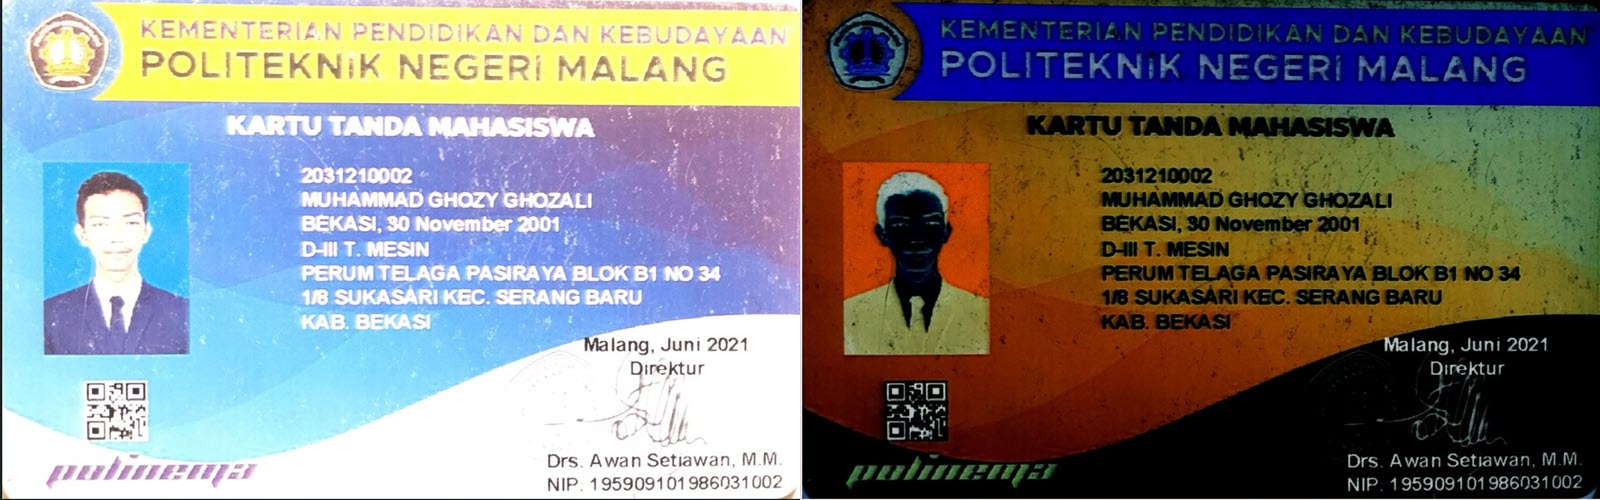

In [4]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

img = cv.imread('/content/drive/MyDrive/images/KTM_lama.jpg')

inverse_img = 255 - img

final_frame = cv.hconcat([img, inverse_img])

cv2_imshow(final_frame)
cv.waitKey(0)
cv.destroyAllWindows()


 Mengubah kontras dan tingkat kecerahan citra 
---------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


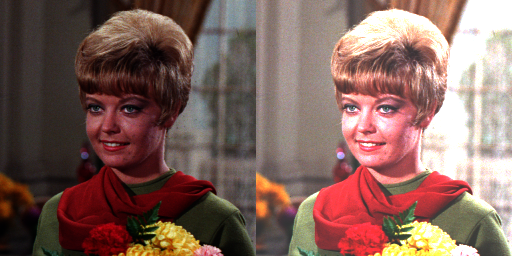

In [5]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(" Mengubah kontras dan tingkat kecerahan citra ")
print("---------------------------------------------")

brightness = int(input("Masukkan tingkat kecerahan [-255 - 255]: "))
contrast = float(input("Masukkan kontras [1.0 - 3.0]: "))

img = cv.imread('/content/drive/MyDrive/images/female.tiff')

new_img = cv.convertScaleAbs(img, alpha=contrast, beta=brightness)

final_frame = cv.hconcat([img, new_img])

cv2_imshow(final_frame)
cv.waitKey(0)
cv.destroyAllWindows()

 Mengubah kecerahan citra dengan Transformasi Log 
-------------------------------------------------
Masukkan nilai kecerahan: 50


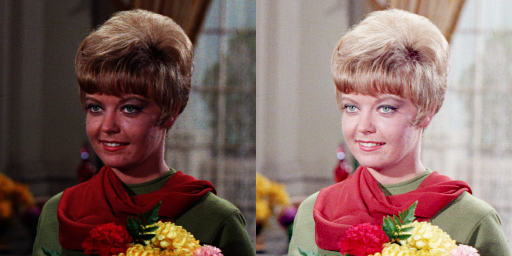

In [6]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

print(" Mengubah kecerahan citra dengan Transformasi Log ")
print("-------------------------------------------------")

c = int(input("Masukkan nilai kecerahan: "))

img = cv.imread('/content/drive/MyDrive/images/female.tiff')
img = img.astype(np.float32)

log_transformed = c * np.log(1 + img)

log_transformed = np.uint8(cv.normalize(log_transformed, None, 0, 255, cv.NORM_MINMAX))

final_frame = cv.hconcat([np.uint8(img), log_transformed])

cv2_imshow(final_frame)
cv.waitKey(0)
cv.destroyAllWindows()

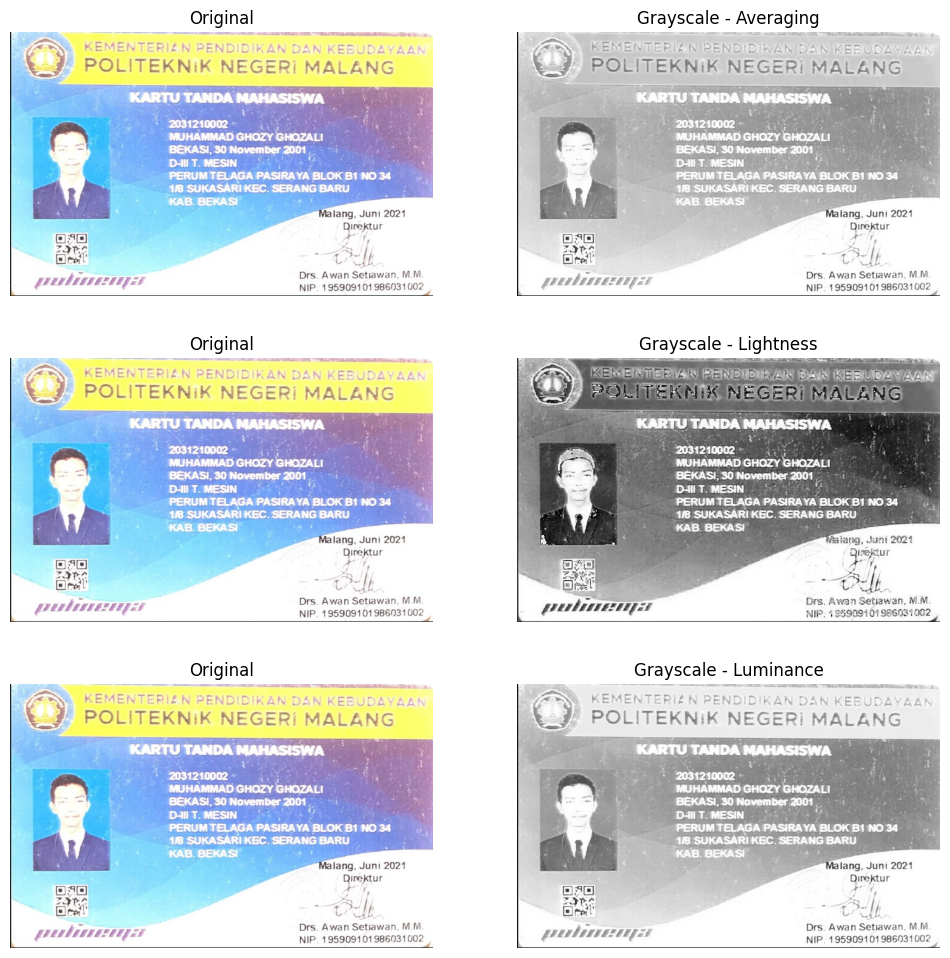

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca citra
img = cv.imread('/content/drive/MyDrive/images/KTM_lama.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# --- Grayscale dengan Averaging ---
gray_avg = np.mean(img_rgb, axis=2).astype(np.uint8)

# --- Grayscale dengan Lightness ---
gray_light = ((np.max(img_rgb, axis=2) + np.min(img_rgb, axis=2)) / 2).astype(np.uint8)

# --- Grayscale dengan Luminance ---
gray_lum = (0.299 * img_rgb[:,:,0] +
            0.587 * img_rgb[:,:,1] +
            0.114 * img_rgb[:,:,2]).astype(np.uint8)

# --- Tampilkan hasil ---
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

# Original + Averaging
axs[0,0].imshow(img_rgb)
axs[0,0].set_title("Original")
axs[0,0].axis("off")
axs[0,1].imshow(gray_avg, cmap='gray')
axs[0,1].set_title("Grayscale - Averaging")
axs[0,1].axis("off")

# Original + Lightness
axs[1,0].imshow(img_rgb)
axs[1,0].set_title("Original")
axs[1,0].axis("off")
axs[1,1].imshow(gray_light, cmap='gray')
axs[1,1].set_title("Grayscale - Lightness")
axs[1,1].axis("off")

# Original + Luminance
axs[2,0].imshow(img_rgb)
axs[2,0].set_title("Original")
axs[2,0].axis("off")
axs[2,1].imshow(gray_lum, cmap='gray')
axs[2,1].set_title("Grayscale - Luminance")
axs[2,1].axis("off")

plt.show()

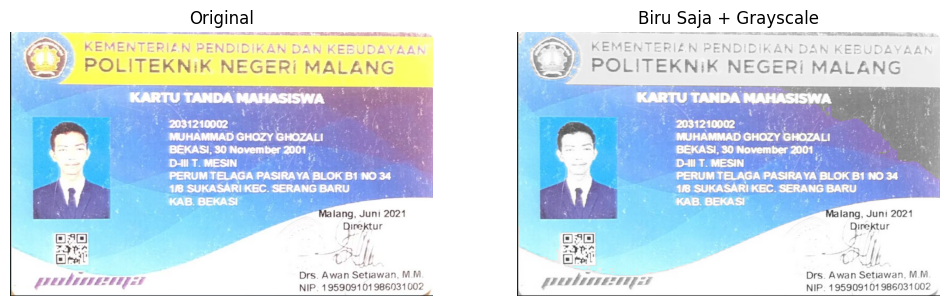

In [8]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('/content/drive/MyDrive/images/KTM_lama.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])

mask = cv.inRange(hsv, lower_blue, upper_blue)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_rgb = cv.cvtColor(gray, cv.COLOR_GRAY2RGB)

result = np.where(mask[:, :, None] != 0, img_rgb, gray_rgb)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(img_rgb)
axs[0].set_title("Original")
axs[0].axis("off")

axs[1].imshow(result)
axs[1].set_title("Biru Saja + Grayscale")
axs[1].axis("off")

plt.show()